# CS552J Data Mining with Deep Learning

## How to Train a Neural Network

### Dataset: MNIST

The MINIST dataset is an image classification dataset used to benchmark computer vision models. The dataset was created by Yann LeCun in 1998 and is famous for proving the concept that neural networks have the ability to classify image data. The MNIST dataset has been loaded to the Jupyter Notebook from the deep learning library TensorFlow. The MNIST dataset consists of 70 000, 28 x 28 pixel resolution images of handwritten digets from 0 to 9 gatheered from the postal service in the United States of America. Therefore modelling with machine learning on the MNIST dataset is a 10 class multi-class classification problem.

MNIST Dataset Research Paper Web Link:

https://ieeexplore.ieee.org/document/726791

This notebook and the PyTorch version can be found on GitHub at:

https://github.com/Stevieee83/Computer-Vision-Deep-Learning


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

print("Tensorflow Version", tf.__version__)

Tensorflow Version 2.18.0


# Set the Random Seed to Repeat Randomisation in the Colab Notebook

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

# MNIST Dataset TensorFlow Documentation Web Link:

https://www.tensorflow.org/datasets/keras_example

Load the MNIST dataset set and output the first image in the dataset to the screen. This verifies we are using the correct image data to train our model. The MNIST dataset is normalised between -1 and 1 and the dataset consists of greyscale images with only one colour channel.

Min value: -1.0
Max value: 1.0


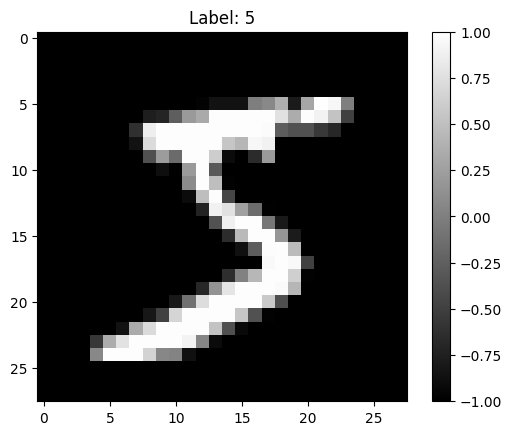

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize dataset to [0,1] first
x_train, x_test = x_train / 255.0, x_test / 255.0

# Transform from [0,1] to [-1,1]
x_train = 2 * x_train - 1
x_test = 2 * x_test - 1

# Verify the normalization
print(f"Min value: {x_train.min()}")
print(f"Max value: {x_train.max()}")

# Visualize an example from the MNIST dataset
plt.figure()
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.colorbar()
plt.show()

# Reduce the Size of the MNIST Training Dataset to 20 Images Per Class, Total = 200 Images

Reducing the size of the training dataset to twenty images per class allows us to work with a smaller dataset to set the learning rate for our neural network. Setting the learning rate correctly for any neural network will speed up the training process overall. A well set learning will reduce the time the parameters inside the neural network architecture take to converge to their local minimum. A learning rate cannot be set too low but lower learning rates could increase the training time of a neural network for the same performance metric results as a neural network with a higher well set learning rate.

For more information on hyperparameter tuning please refer to pages 415 to 430 of the Deep Learning textbook by Ian Goodfellow. Chapter 11 of the Deep Learning textbook is good for gaining an understanding of the practical methodology of training neural networks. These concepts apply to all deep learning models on any type of data i.e. images, natural language or tabular.

In [ ]:
# Select 20 samples per class
num_classes = 10
samples_per_class = 20
x_train_reduced, y_train_reduced = [], []

for digit in range(num_classes):
    indices = np.where(y_train == digit)[0][:samples_per_class]
    x_train_reduced.append(x_train[indices])
    y_train_reduced.append(y_train[indices])

# Convert lists to NumPy arrays
x_train_reduced = np.concatenate(x_train_reduced, axis=0)
y_train_reduced = np.concatenate(y_train_reduced, axis=0)

# Shuffle the reduced dataset
shuffled_indices = np.random.permutation(len(y_train_reduced))
x_train_reduced, y_train_reduced = x_train_reduced[shuffled_indices], y_train_reduced[shuffled_indices]

# Expand dimensions to match the model's expected input shape (28,28,1)
x_train_reduced = np.expand_dims(x_train_reduced, axis=-1)

# Set Learning Rate to 0.1

It is good to start with a high learning rate and train the neural network on the reduced size dataset for 20 epochs. After a neural network has been trained for one cycle of 20 epochs the learning rate is reduced by a factor depending on the complexity of the data and the model architecture. For this notebook, we reduce the learning rate from 0.1 to 0.01 to 0.001 and 0.0001. This process will help us determine the optimal learning rate to use to speed up training and get the best performance possible out of our neural network. On more complex neural network architectures and data the amount the learning rate is reduced by can be smaller, automated with a for loop then left running recoding the results to analyse afterwards.

When using pre-trained models for any type of transfer learning it is recommended to use the learning rate that was used during the pre-training stage as a starting point. The learning rate set during the pre-training stage is usually set in a controlled laboratory over multiple experiments. Therefore the learning rate that was used to pre-train the model used may be sufficient or is required to be reduced to get the best results from a neural network model.

In [ ]:
# Define the FNN model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),  # Flatten 28x28 image to 1D
    tf.keras.layers.Dense(100, activation='relu'),     # Input layer
    tf.keras.layers.Dense(64, activation='relu'),      # Hidden layer
    tf.keras.layers.Dense(10, activation='softmax')    # Output layer (10 classes)
])

# Compiles the TensorFlow Keras Neural Network classifier with the AdamW optimiser
model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.1,
                                beta_1=0.9,
                                beta_2=0.999,
                                epsilon=1e-07),
                                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                                metrics=['accuracy'])

# Train the model for 20 epochs on the reduced dataset
history = model.fit(x_train_reduced, y_train_reduced, epochs=20, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.0941 - loss: 68.7697
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0920 - loss: 3.6150
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0992 - loss: 2.5013 
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0883 - loss: 2.3414
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0845 - loss: 2.3205 
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1038 - loss: 2.3094 
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1057 - loss: 2.3068 
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1057 - loss: 2.3070 
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1057 - loss: 2.3077
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1057 - loss: 2.3083
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1057 - loss: 2.3083 
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1057 - loss: 2

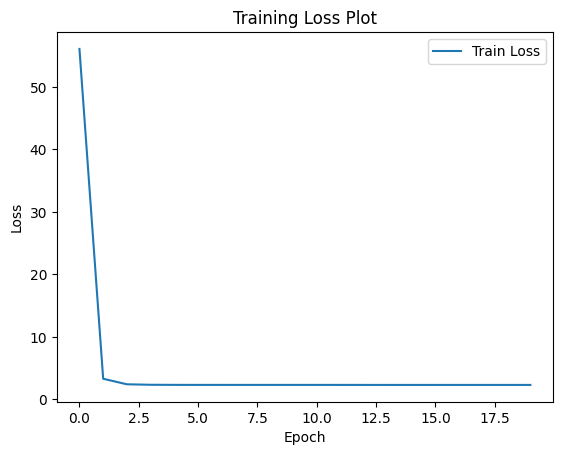

In [ ]:
# Stores the training and validation loss from training
loss = history.history["loss"]

# Conts the number of training epochs run during training
epochs = range(len(history.history["loss"]))

# Plots the training and validation loss
plt.plot(epochs, loss, label="Train Loss")
plt.title("Training Loss Plot")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Reduce Learning Rate to 0.01

In [ ]:
# Define the FNN model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),  # Flatten 28x28 image to 1D
    tf.keras.layers.Dense(100, activation='relu'),     # Input layer
    tf.keras.layers.Dense(64, activation='relu'),      # Hidden layer
    tf.keras.layers.Dense(10, activation='softmax')    # Output layer (10 classes)
])

# Compiles the TensorFlow Keras Neural Network classifier with the AdamW optimiser
model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.01,
                                beta_1=0.9,
                                beta_2=0.999,
                                epsilon=1e-07),
                                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                                metrics=['accuracy'])

# Train the model for 20 epochs on the reduced dataset
history = model.fit(x_train_reduced, y_train_reduced, epochs=20, batch_size=32)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.1185 - loss: 5.3451
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2859 - loss: 2.4644 
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4962 - loss: 1.5449 
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6215 - loss: 1.1373 
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7449 - loss: 0.8258 
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8382 - loss: 0.5682
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8836 - loss: 0.4117 
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9562 - loss: 0.2461
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9813 - loss: 0.1692
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9845 - loss: 0.1176
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9931 - loss: 0.0776
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9931 - loss: 0.0

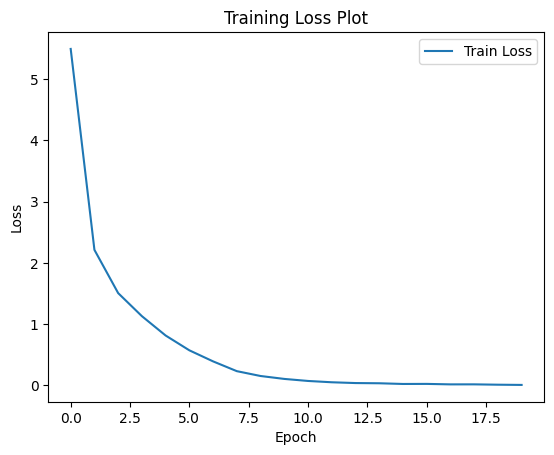

In [ ]:
# Stores the training and validation loss from training
loss = history.history["loss"]

# Conts the number of training epochs run during training
epochs = range(len(history.history["loss"]))

# Plots the training and validation loss
plt.plot(epochs, loss, label="Train Loss")
plt.title("Training Loss Plot")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Reduce Learning Rate to 0.001

In [ ]:
# Define the FNN model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),  # Flatten 28x28 image to 1D
    tf.keras.layers.Dense(100, activation='relu'),     # Input layer
    tf.keras.layers.Dense(64, activation='relu'),      # Hidden layer
    tf.keras.layers.Dense(10, activation='softmax')    # Output layer (10 classes)
])

# Compiles the TensorFlow Keras Neural Network classifier with the AdamW optimiser
model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001,
                                                  beta_1=0.9,
                                                  beta_2=0.999,
                                                  epsilon=1e-07),
                                                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                                                  metrics=['accuracy'])

# Train the model for 20 epochs on the reduced dataset
history = model.fit(x_train_reduced, y_train_reduced, epochs=20, batch_size=32)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1212 - loss: 2.4178
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5627 - loss: 1.7133
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6904 - loss: 1.2548
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8291 - loss: 0.9328
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8691 - loss: 0.6896
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8850 - loss: 0.5141
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9231 - loss: 0.3928 
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9313 - loss: 0.3008
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9745 - loss: 0.2362
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9854 - loss: 0.1899
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9881 - loss: 0.1519
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9950 - loss: 0.1260 
E

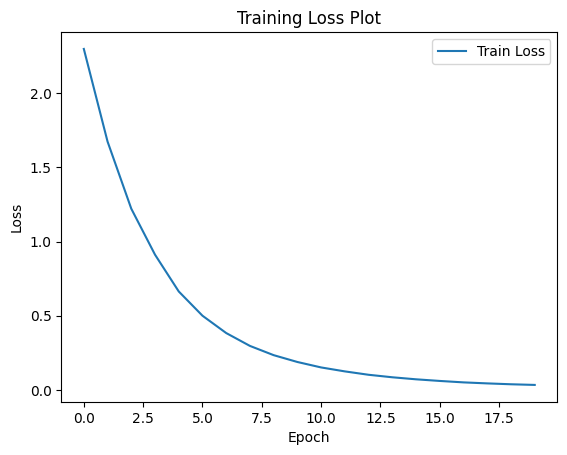

In [ ]:
# Stores the training and validation loss from training
loss = history.history["loss"]

# Conts the number of training epochs run during training
epochs = range(len(history.history["loss"]))

# Plots the training and validation loss
plt.plot(epochs, loss, label="Train Loss")
plt.title("Training Loss Plot")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Learning Rate to Set the Neural Network to

From the loss curve line plot above it can be seen that our Cross Entropy loss has reduced over a period of 20 epochs with a small dataset smoothly. Therefore we will reduce the learning rate from 0.001 to 0.0001 just to check whether the learning rate set for the neural network above is adequate or not.

# Reduce Learning Rate to 0.0001

In [ ]:
# Define the FNN model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),  # Flatten 28x28 image to 1D
    tf.keras.layers.Dense(100, activation='relu'),     # Input layer
    tf.keras.layers.Dense(64, activation='relu'),      # Hidden layer
    tf.keras.layers.Dense(10, activation='softmax')    # Output layer (10 classes)
])

# Compiles the TensorFlow Keras Neural Network classifier with the AdamW optimiser
model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.0001,
                                beta_1=0.9,
                                beta_2=0.999,
                                epsilon=1e-07),
                                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                                metrics=['accuracy'])

# Train the model for 20 epochs on the reduced dataset
history = model.fit(x_train_reduced, y_train_reduced, epochs=20, batch_size=32)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.1078 - loss: 2.5753
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1571 - loss: 2.2724
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2228 - loss: 2.1108 
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3461 - loss: 2.0048 
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4606 - loss: 1.9080 
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4982 - loss: 1.8178
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5444 - loss: 1.7345
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5751 - loss: 1.6524 
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6330 - loss: 1.5723
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6682 - loss: 1.4931
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6979 - loss: 1.4186 
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7534 - loss: 1.3

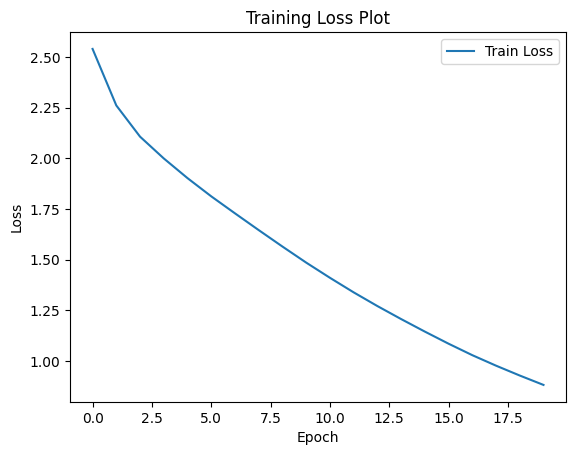

In [ ]:
# Stores the training and validation loss from training
loss = history.history["loss"]

# Conts the number of training epochs run during training
epochs = range(len(history.history["loss"]))

# Plots the training and validation loss
plt.plot(epochs, loss, label="Train Loss")
plt.title("Training Loss Plot")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

It can be seen from the loss curve line plot above that the Cross-Entropy loss is reducing smoothly, but not as much as for the previous model where we set our learning rate to 0.001. Therefore a good learning rate for us to use to train our neural network is 0.001. If we set the learning rate for our neural network model to 0.0001 it would likely take longer to train for similar performance.

# Reload the Whole MNIST Dataset of 70 000 Images

We will now load the whole MNIST dataset from the TensorFlow library to train our neural network. The MNIST image data is split into training, validation and test dataset splits to train and evaluate or neural network. Therefore, we can simulate as best as possible how our neural network will predict on unseen data if deployed in the backend of any application. This is called the holdout method. More information on the holdout method is explained in the textbook Python Machine Learning 3rd edition by Sebastian Raschka and Vahid Mirjalili in chapter 6 on page 196.

In [ ]:
import tensorflow_datasets as tfds

# Load MNIST dataset with a 80-20 train-validation dataset split
ds_train, ds_val, ds_test = tfds.load(
    'mnist',
    split=['train[:90%]', 'train[90%:]', 'test'],
    as_supervised=True
)

# Normalize function: Scale images to [-1, 1] with zero mean
def normalize_img(image, label):
    """Normalize images to [-1, 1] with zero mean."""
    image = tf.cast(image, tf.float32) / 255.0  # Scale to [0, 1]
    image = (image - 0.5) * 2  # Scale to [-1, 1]
    return image, label

# Apply normalization and batching
ds_train = ds_train.map(normalize_img).shuffle(10000).batch(32)
ds_val = ds_val.map(normalize_img).batch(32)
ds_test = ds_test.map(normalize_img).batch(32)

# Extract images from a training batch
ds_normalized_batch = list(ds_train.take(1))[0]
normalized_images, normalized_labels = ds_normalized_batch

# Verify the normalization
print("Normalized training image pixel range:")
print(f"  Data type: {normalized_images.dtype}")
print(f"  Range: [{tf.reduce_min(normalized_images).numpy()}, {tf.reduce_max(normalized_images).numpy()}]\n")

# Extract images from a training batch
ds_normalized_batch = list(ds_val.take(1))[0]
normalized_images, normalized_labels = ds_normalized_batch

# Verify the normalization
print("Normalized validation image pixel range:")
print(f"  Data type: {normalized_images.dtype}")
print(f"  Range: [{tf.reduce_min(normalized_images).numpy()}, {tf.reduce_max(normalized_images).numpy()}]\n")

# Extract images from a training batch
ds_normalized_batch = list(ds_test.take(1))[0]
normalized_images, normalized_labels = ds_normalized_batch

# Verify the normalization
print("Normalized test image pixel range:")
print(f"  Data type: {normalized_images.dtype}")
print(f"  Range: [{tf.reduce_min(normalized_images).numpy()}, {tf.reduce_max(normalized_images).numpy()}]")

Normalized training image pixel range:
  Data type: <dtype: 'float32'>
  Range: [-1.0, 1.0]

Normalized validation image pixel range:
  Data type: <dtype: 'float32'>
  Range: [-1.0, 1.0]

Normalized test image pixel range:
  Data type: <dtype: 'float32'>
  Range: [-1.0, 1.0]


In [ ]:
# Check dataset size
train_count = sum(1 for _ in ds_train)
val_count = sum(1 for _ in ds_val)
test_count = sum(1 for _ in ds_test)

print(f"Training batches: {train_count}, Validation batches: {val_count}, Test batches: {test_count}\n")
print(f"Number of Training Images: {len(ds_train) * 32}, Validation Images: {len(ds_val) * 32}, and Test Images: {len(ds_test) * 32}")

Training batches: 1688, Validation batches: 188, Test batches: 313

Number of Training Images: 54016, Validation Images: 6016, and Test Images: 10016


# TensorFlow 2 Neural Network Model Architecture

The neural network model architecture is in the code cell below. As you can see the network has more parameters and an extra hidden layer to the one used to set the learning rate. The neural network training was started with the same smaller architecture used to set the learning rate. The number of parameters was gradually increased until the neural network's minimum validation loss stopped decreasing during the training process.

In [ ]:
# Define a Feedforward Neural Network FNN
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),  # Flatten 28x28 image to 1D
    tf.keras.layers.Dense(128, activation='relu'),     # Input layer 1
    tf.keras.layers.Dense(64, activation='relu'),      # Hidden layer
    tf.keras.layers.Dense(10, activation='softmax')    # Output layer (10 classes)
])

# Display a summary of the FNN model architecture
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the TensorFlow Neural Network and Configure Early Stopping

Configuring early stopping will stop the training process when the validation loss stops decreasing for a period of 3 epochs (patience). Early stopping helps reduce overfitting and increases the generalisation performance of the network.

To restart the training process after running it in the notebook once, re-run the code from the code cell above to delete the weight parameters in the model object. If the training is recommenced it will continue from the weight parameters set during the last training cycle, not randomised weights as we require. This is because the model weight values are still set in the memory of the runtime.

After setting the learning rate, and increasing the parameters and layers in the neural network the weight decay regularisation hyperparameter was set to 0.0001. As regularisation has less effect on the network results than the learning rate and the number of parameters in the network it is set last.

In [ ]:
# Initialise early stopping to the validation loss and with a patience of 3 epochs
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Compiles the TensorFlow Keras Neural Network classifier with the AdamW optimiser
model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001,
                                                  weight_decay=0.0001,
                                                  beta_1=0.9,
                                                  beta_2=0.999,
                                                  epsilon=1e-07),
                                                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                                                  metrics=['accuracy']
                                                  )

# Train the model for a maximum of 20 epochs on the entire MNIST dataset
history = model.fit(ds_train, epochs=20, validation_data=ds_val, callbacks=[callback])

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8377 - loss: 0.5247 - val_accuracy: 0.9407 - val_loss: 0.1994
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9447 - loss: 0.1804 - val_accuracy: 0.9630 - val_loss: 0.1374
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9600 - loss: 0.1305 - val_accuracy: 0.9648 - val_loss: 0.1240
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9673 - loss: 0.1084 - val_accuracy: 0.9685 - val_loss: 0.1138
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9718 - loss: 0.0910 - val_accuracy: 0.9683 - val_loss: 0.1197
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9736 - loss: 0.0835 - val_accuracy: 0.9697 - val_loss: 0.1061
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9755 - loss: 0.0750 - val_accuracy: 0.9677 - val_loss: 0.1126
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9779 - loss: 0.

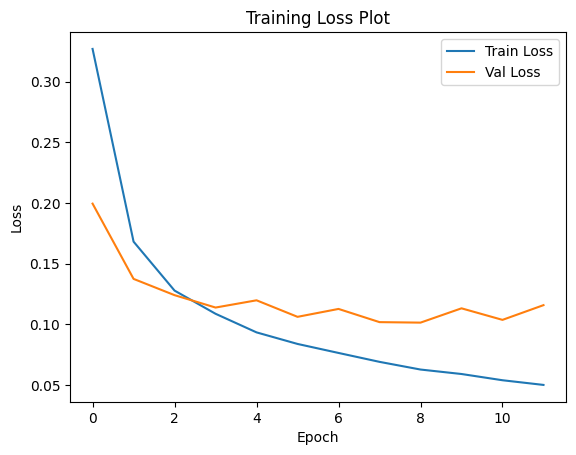

In [ ]:
# Stores the training and validation loss from training
loss = history.history["loss"]
val_loss = history.history["val_loss"]

# Conts the number of training epochs run during training
epochs = range(len(history.history["loss"]))

# Plots the training and validation loss
plt.plot(epochs, loss, label="Train Loss")
plt.plot(epochs, val_loss, label="Val Loss")
plt.title("Training Loss Plot")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

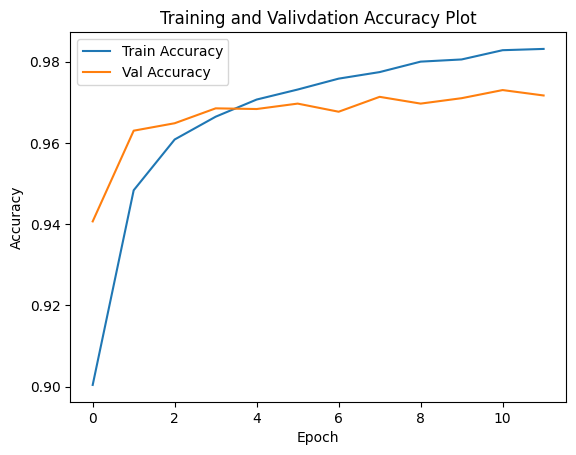

In [ ]:
# Stores the training and validation accuracy from training
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

# Plots the training and validation accuracy
plt.plot(epochs, accuracy, label="Train Accuracy")
plt.plot(epochs, val_accuracy, label="Val Accuracy")
plt.title("Training and Valivdation Accuracy Plot")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Training and Validation Loss Curves

We can see from our training and validation loss curve line plots that we have reduced the loss and increased the accuracy as we expected. We can now save our trained model weights file to an output filepath directory. Saving the model weights file allows us to use it on the test dataset and to deploy or use the model for it's intended application.

# Save the Model Weights File and Reload to the Notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Make the output file path directory for the model weights file to be saved to
os.makedirs('/content/drive/MyDrive/data_mining_with_deep_learning', exist_ok=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Saves the model weights as classifier.h5
model.save('/content/drive/MyDrive/data_mining_with_deep_learning/mnist.h5')

In [ ]:
# Reloads the classifier.h5 model weights
reloaded_model = tf.keras.models.load_model('/content/drive/MyDrive/data_mining_with_deep_learning/mnist.h5')

# Test the Trained Model

# Prepare the Image Data and the Labels for Evaluation with ScikitLearn

In [ ]:
# Convert ds_test to NumPy arrays
X_test, y_test = [], []

for images, labels in ds_test:     # Unpack correctly
    X_test.append(images.numpy())  # Convert Tensor to NumPy
    y_test.append(labels.numpy())  # Convert Tensor to NumPy array

# Stack into arrays
X_test = np.concatenate(X_test, axis=0)
y_test = np.concatenate(y_test, axis=0)

print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_test shape: (10000, 28, 28, 1)
y_test shape: (10000,)


# Test Evaluation Metrics with ScikitLearn

Run the test metrics on the test dataset that the model has not seen during the training or validation process. The results from the test set is what we report or publish to show how well our neural network model generalises to unseen data. For more information on the test performance metrics used please refer to Chapter 6 of Python Machine Learning 3rd edition by Sebastian Raschka and Vahid Mirjalil.

The test dataset should only be used at test time and not to tune the hyperparameters of the neural network. This is because the training and validation datasets are for tuning hyperparameters. The test dataet is only to test how well our neural network is generlising to unseen data.

In [ ]:
# Make predictions on test data
print("\nMaking predictions on test data...")
y_pred_prob = reloaded_model.predict(ds_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert one-hot predictions back to class indices


Making predictions on test data...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten the arrays for metric computation
y_test_flat = y_test.flatten()  # Assuming y_test is already class labels (not one-hot)
y_pred_flat = y_pred.flatten()

# Calculate and display metrics using scikit-learn
print("\n--- Model Evaluation with scikit-learn ---")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Compute overall scores
precision_macro = precision_score(y_test_flat, y_pred_flat, average='macro')
recall_macro = recall_score(y_test_flat, y_pred_flat, average='macro')
f1_macro = f1_score(y_test_flat, y_pred_flat, average='macro')

print(f"Precision: {precision_macro:.4f}")
print(f"Recall: {recall_macro:.4f}")
print(f"F1 Score: {f1_macro:.4f}")

# Also you can evaluate the model's test accuracy and loss using Keras' model.evaluate()
loss, accuracy = reloaded_model.evaluate(ds_test)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")


--- Model Evaluation with scikit-learn ---
Accuracy: 0.9711
Precision: 0.9719
Recall: 0.9707
F1 Score: 0.9711
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9721 - loss: 0.0967
Loss: 0.0984, Accuracy: 0.9711


In [ ]:
# Classification Report (per-class metrics)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


Classification Report:
              precision    recall  f1-score   support

           0     0.9907    0.9796    0.9851       980
           1     0.9674    0.9947    0.9809      1135
           2     0.9813    0.9680    0.9746      1032
           3     0.9174    0.9891    0.9519      1010
           4     0.9764    0.9695    0.9729       982
           5     0.9760    0.9563    0.9660       892
           6     0.9863    0.9749    0.9806       958
           7     0.9898    0.9426    0.9656      1028
           8     0.9635    0.9754    0.9694       974
           9     0.9699    0.9574    0.9636      1009

    accuracy                         0.9711     10000
   macro avg     0.9719    0.9707    0.9711     10000
weighted avg     0.9717    0.9711    0.9712     10000



Confusion Matrix:


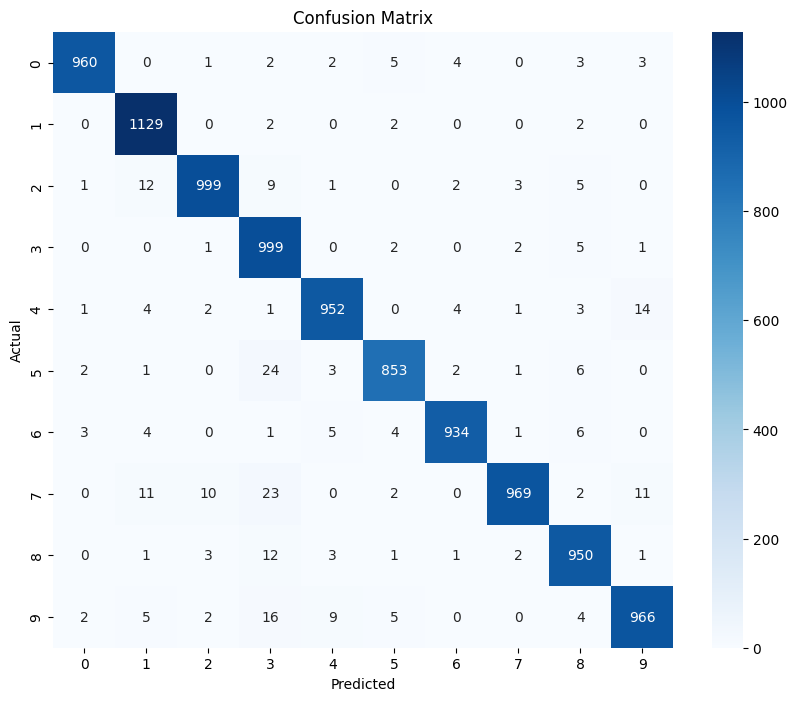

In [ ]:
# Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Aditional Information on TensorFlow

Deep learning libraries are also used because they allow us to easily use a GPU during training. TensorFlow and PyTorch come with GPU drivers that are pre-written in CUDA. CUDA is a lower-level programming language than Python based on the C programming language. Each model of CUDA GPU has a different driver for every CUDA GPU on the market. Therefore if we were to write our neural network code from scratch in Python NumPy we would have to write the CUDA driver for each model of GPU we use to train and test our neural network. This reduces the time for us to train and test our models and ensures we are using well-optimised software from a recognised deep leaning library.

# TensorFlow Model Debugging and GPU Use

When writing the software for TensorFlow, PyTorch or any other neural network model start with a small neural network architecture and a dataset of one training example per class per dataset split. This approach allows you to develop the software on a CPU faster than if you are using a large-sized network architecture or a large dataset or both.

Once the neural network code is debugged, set the learning rate with the code for 20 examples per class (images) as shown above. Only use a GPU on the whole dataset once you are ready to train, validate and test your neural network. This will save on GPU credits with Google Colab, AWS, Icloud, RunPod or any other GPU cloud-based provider. If you are training a neural network on a local PC with a GPU or high-performance computing (HPC) cluster energy consumption/costs will be reduced from only using GPU/s when you require them.

# Useful Resources

MIT 6.S191: Introduction to Deep Learning

https://www.youtube.com/playlist?list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI

Stanford University - Convolutional Neural Networks for Visual Recognition

https://www.youtube.com/playlist?list=PL3FW7Lu3i5JvHM8ljYj-zLfQRF3EO8sYv


TensorFlow 2 Guide

https://www.tensorflow.org/guide


# References

Christopher M. Bishopl. Pattern Recognition and Machine Learning. Bas-
ingstoke, UK: Springer, 2007. ISBN: 978-0387310732.

Ian Goodfellow, Yosua Bengio, and Aaron Courville. Deep Learning. Mas-
sachusetts, USA: MIT Press, 2016. ISBN: 978-0262035613

Sebastian Raschka and Vahid Mirjalili. Machine Learning with Python,
Scikit-Learn and TensorFlow 2. Birmingham, UK: Packt Publishing, 2019.
ISBN: 978-1-78995-575-0.



In [ ]:
%whos

Variable                Type             Data/Info
--------------------------------------------------
X_test                  ndarray          10000x28x28x1: 7840000 elems, type `float32`, 31360000 bytes (29.9072265625 Mb)
accuracy                float            0.9710999727249146
accuracy_score          function         <function accuracy_score at 0x7b3410f25580>
callback                EarlyStopping    <keras.src.callbacks.earl<...>object at 0x7b341908e3d0>
classification_report   function         <function classification_<...>report at 0x7b3410f26a20>
cm                      ndarray          10x10: 100 elems, type `int64`, 800 bytes
confusion_matrix        function         <function confusion_matrix at 0x7b3410f256c0>
digit                   int              9
drive                   module           <module 'google.colab.dri<...>s/google/colab/drive.py'>
ds_normalized_batch     tuple            n=2
ds_test                 _BatchDataset    <_BatchDataset element_sp<...>pe=tf.int64,